In [43]:
# Import Numpy for calculations, matplotlib for charting, & Pandas because everyone loves Pandas
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# Load in clinical trial data csv
clinical_trial_df = pd.read_csv("/Users/rohanmohindroo/Documents/NUCHI201804DATA2-Class-Repository-DATA/05-Matplotlib/Homework/Instructions/Pymaceuticals/raw_data/clinicaltrial_data.csv")
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
# Load in mouse drug data csv
mouse_drug_df = pd.read_csv("/Users/rohanmohindroo/Documents/NUCHI201804DATA2-Class-Repository-DATA/05-Matplotlib/Homework/Instructions/Pymaceuticals/raw_data/mouse_drug_data.csv")
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [46]:
# Merge the two dataframes using an outer join
merge_drug_data = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID", how="outer")
merge_drug_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [47]:
reduced_clinical_df = merge_drug_data.loc[:, ["Drug", "Timepoint", "Tumor Volume (mm3)"]]
reduced_clinical_df.head()

drug_totals = reduced_clinical_df.set_index('Drug', 'Timepoint')
drug_totals.head()

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000000
Capomulin,5,45.651331
Capomulin,10,43.270852
Capomulin,15,43.784893
Capomulin,20,42.731552


In [48]:
drug_totals_pivot = pd.pivot_table(drug_totals, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
drug_totals_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Text(0,0.5,'Tumor Volume (mm3)')

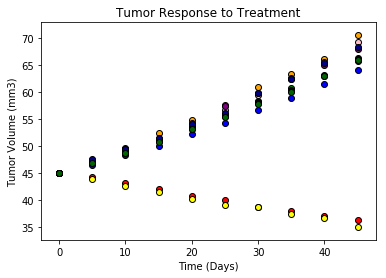

In [63]:
Capomulin = [45.00, 44.27, 43.08, 42.06, 40.72, 39.94, 38.77, 37.85, 36.96, 36.24]
Ceftamin = [45.00, 46.50, 48.29, 50.09, 52.16, 54.29, 56.77, 58.83, 61.47, 64.13]
Infubinol = [45.00, 47.06, 49.40, 51.30, 53.20, 55.72, 58.30, 60.74, 63.16, 65.76]
Ketapril = [45.00, 47.40, 49.58, 52.40, 54.92, 57.68, 60.99, 63.37, 66.07, 70.66]
Naftisol = [45.00, 46.80, 48.69, 50.93, 53.64, 56.73, 59.56, 62.69, 65.60, 69.27]
Placebo = [45.00, 47.13, 49.42, 51.34, 54.36, 57.48, 59.81, 62.42, 65.05, 68.08]
Popriva = [45.00, 47.25, 49.10, 51.07, 53.35, 55.50, 58.20, 60.35, 63.05, 66.26]
Ramicane = [45.00, 43.94, 42.53, 41.50, 40.24, 38.97, 38.70, 37.45, 36.57, 34.96]
Stelasyn = [45.00, 47.53, 49.46, 51.53, 54.07, 56.17, 59.83, 62.44, 65.36, 68.44]
Zoniferol = [45.00, 46.85, 48.69, 50.78, 53.17, 55.43, 57.71, 60.09, 62.92, 65.96]
Timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.scatter(Timepoint, Capomulin, marker="o", facecolors="red", edgecolors="black", label="Capomulin")
plt.scatter(Timepoint, Ceftamin, marker="o", facecolors="blue", edgecolors="black", label="Ceftamin")
plt.scatter(Timepoint, Infubinol, marker="o", facecolors="green", edgecolors="black", label="Infubinol")
plt.scatter(Timepoint, Ketapril, marker="o", facecolors="orange", edgecolors="black", label="Ketapril")
plt.scatter(Timepoint, Naftisol, marker="o", facecolors="pink", edgecolors="black", label="Naftisol")
plt.scatter(Timepoint, Placebo, marker="o", facecolors="purple", edgecolors="black", label="Placebo")
plt.scatter(Timepoint, Popriva, marker="o", facecolors="black", edgecolors="black", label="Popriva")
plt.scatter(Timepoint, Ramicane, marker="o", facecolors="yellow", edgecolors="black", label="Ramicane")
plt.scatter(Timepoint, Stelasyn, marker="o", facecolors="DarkBlue", edgecolors="black", label="Stelasyn")
plt.scatter(Timepoint, Zoniferol, marker="o", facecolors="DarkGreen", edgecolors="black", label="Zoniferol")

# Give the chart a title, x label, and y label
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [59]:
met_merge = merge_drug_data.dropna(how='any')
met_merge

reduced_met = merge_drug_data.loc[:, ["Drug", "Timepoint", "Metastatic Sites"]]
reduced_met.head()

met_totals = reduced_met.set_index('Drug', 'Timepoint')
met_totals.head()

,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0
Capomulin,5,0
Capomulin,10,0
Capomulin,15,0
Capomulin,20,0


In [62]:
met_pivot = pd.pivot_table(met_totals, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Text(0,0.5,'Metastatic Sites')

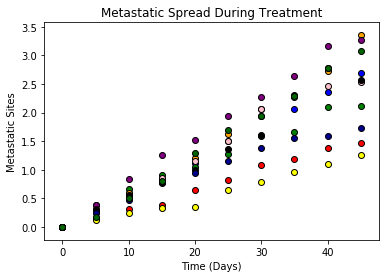

In [64]:
Capomulin = [0.00, 0.16, 0.32, 0.375, 0.652, 0.818, 1.091, 1.182, 1.381, 1.476]
Ceftamin = [0.00, 0.381, 0.600, 0.789, 1.111, 1.500, 1.937, 2.071, 2.357, 2.692]
Infubinol = [0.00, 0.280, 0.667, 0.905, 1.050, 1.278, 1.589, 1.667, 2.100, 2.111]
Ketapril = [0.00, 0.304, 0.591, 0.842, 1.211, 1.632, 2.056, 2.294, 2.733, 3.364]
Naftisol = [0.00, 0.261, 0.524, 0.857, 1.150, 1.500, 2.067, 2.267, 2.467, 2.538]
Placebo = [0.00, 0.375, 0.833, 1.250, 1.526, 1.941, 2.267, 2.643, 3.167, 3.273]
Popriva = [0.00, 0.320, 0.565, 0.765, 1.000, 1.357, 1.615, 2.300, 2.778, 2.571]
Ramicane = [0.00, 0.120, 0.250, 0.333, 0.348, 0.652, 0.783, 0.953, 1.100, 1.250]
Stelasyn = [0.00, 0.240, 0.478, 0.783, 0.952, 1.158, 1.389, 1.563, 1.583, 1.727]
Zoniferol = [0.00, 0.167, 0.500, 0.810, 1.294, 1.688, 1.933, 2.286, 2.786, 3.071]
Timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.scatter(Timepoint, Capomulin, marker="o", facecolors="red", edgecolors="black", label="Capomulin")
plt.scatter(Timepoint, Ceftamin, marker="o", facecolors="blue", edgecolors="black", label="Ceftamin")
plt.scatter(Timepoint, Infubinol, marker="o", facecolors="green", edgecolors="black", label="Infubinol")
plt.scatter(Timepoint, Ketapril, marker="o", facecolors="orange", edgecolors="black", label="Ketapril")
plt.scatter(Timepoint, Naftisol, marker="o", facecolors="pink", edgecolors="black", label="Naftisol")
plt.scatter(Timepoint, Placebo, marker="o", facecolors="purple", edgecolors="black", label="Placebo")
plt.scatter(Timepoint, Popriva, marker="o", facecolors="black", edgecolors="black", label="Popriva")
plt.scatter(Timepoint, Ramicane, marker="o", facecolors="yellow", edgecolors="black", label="Ramicane")
plt.scatter(Timepoint, Stelasyn, marker="o", facecolors="DarkBlue", edgecolors="black", label="Stelasyn")
plt.scatter(Timepoint, Zoniferol, marker="o", facecolors="DarkGreen", edgecolors="black", label="Zoniferol")

# Give the chart a title, x label, and y label
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

In [74]:
merge_drug_data['Mouse ID'] = pd.to_numeric(merge_drug_data['Mouse ID'], errors='raise')
merge_drug_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,NaN,0,45.000000,0,Capomulin
1,NaN,5,45.651331,0,Capomulin
2,NaN,10,43.270852,0,Capomulin
3,NaN,15,43.784893,0,Capomulin
4,NaN,20,42.731552,0,Capomulin
5,NaN,25,43.262145,1,Capomulin
6,NaN,30,40.605335,1,Capomulin
7,NaN,35,37.967644,1,Capomulin
8,NaN,40,38.379726,2,Capomulin
9,NaN,45,38.982878,2,Capomulin


In [78]:
reduced_mouse = merge_drug_data.loc[:, ["Drug", "Timepoint", "Mouse ID"]]
reduced_mouse.head()

mouse_totals = reduced_mouse.set_index('Drug', 'Timepoint')
mouse_totals.head()

,Timepoint,Mouse ID
Drug,,
Capomulin,0,NaN
Capomulin,5,NaN
Capomulin,10,NaN
Capomulin,15,NaN
Capomulin,20,NaN


Three Takeaways:
1) Capomulin and Ramicane were the most effective treatments in regard to reducing the size/volume of tumors over the period of 45 days.
2) Ketapril proved to be the least effective treatment, as it displayed the greatest increase in tumor volume and the greatest degree of metastatic site spread.  Towards the end of the treatment period, Ketapril showed to be even slightly worse than the placebo.
3) Between the two best treatments, Ramicane showed a slightly better percentage decrease in tumor volume, as well as more favorably limiting the spread of metastases.